In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1a)

#### The given equation:

$\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin \theta + C \cos \theta \sin \Omega t$

#### Can be made dimensionless by setting:
$\omega ^2= \frac{g}{l}$ ; $ \beta = \frac{\Omega}{\omega}$ ; $\gamma = \frac{C}{\omega ^2}$ and changing the variable to $ x = \omega t$. 

#### First, differentiate $ x = \omega t$ twice:
$ x = \omega t$

$\frac{dx}{dt} = \omega$     (1)

$\frac{d^2x}{dt^2} = 0$     (2)
#### Then by the chain rule;

$ \frac{d\theta}{dt} = \frac{d\theta}{dx} \frac{dx}{dt} = \frac{d\theta}{dx} \omega$    (3) 

#### Therefore using the product rule:

$ \frac{d^2\theta}{dt^2} =  \frac{dx}{dt}  \frac{d^2\theta}{dtdx}  +  \frac{d \theta}{dx}\frac{d^2x}{dt^2} \implies \frac{dx}{dt} \cdot \frac{d}{dx}(\frac{d\theta}{dt})  +  \frac{d \theta}{dx}\frac{d^2x}{dt^2}$     (4)

#### Substituting (1) and (2) into (4):

$ \frac{d^2\theta}{dt^2} = \omega \cdot \frac{d}{dx}(\omega \frac{d\theta}{dx}) +  \frac{d \theta}{dx}\cdot 0 = \omega^2 \frac{d^2\theta}{dx^2}$ 

#### Finally, reconstructing the equation with the new constants and variable change it becomes:

$\omega^2 \frac{d^2\theta}{dx^2} = -\omega^2 \sin \theta + \omega^2 \gamma \cos \theta \sin \omega \beta t =  -\omega^2 \sin \theta + \omega^2 \gamma \cos \theta \sin x\beta \implies \frac{d^2\theta}{dx^2} =-\sin \theta + \gamma \cos \theta \sin x\beta $

#### Now seperate this second order into two first order D.E.s by introducing new variables:

$ z = \frac{d\theta}{dx} \rightarrow \frac{dz}{dx} = \frac{d^2\theta}{dx^2} = -\sin z_1 + \gamma \sin x\beta \cos z_1 $

#### So:
$ z = \frac{d\theta}{dx}$

$\frac{dz}{dx}= -\sin \theta + \gamma \sin x\beta \cos \theta $

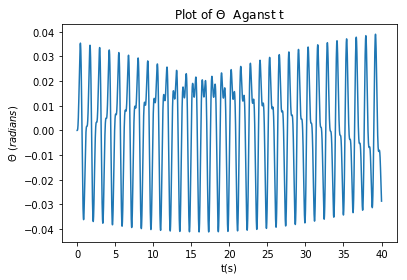

In [2]:
#1b
#Solving for theta means solving for z_1
#changed t to x so t=0 and t=40s need to be changed
#Initial condition is theta (z_1) = 0 and dtheta/dt=0 -> need to be changed as variable changed to x

# Import the required modules
import numpy as np
import scipy
from printSoln import *
from run_kut4 import *
import pylab as pl

g=9.81 #ms^-2
l=0.1 #m
C=2 #s^-2
OMEGA=5 #s^-1

omega=np.sqrt(g/l)

# First set up the right-hand side RHS) of the equation
Gamma= C/omega**2
beta=OMEGA/omega
def Eqs(x,y):
    f=np.zeros(2)            # sets up RHS as a vector 
    f[0]=y[1]
    f[1]=-np.sin(y[0])+Gamma*np.sin(x*beta)*np.cos(y[0])  # RHS; note that z is also a vector
    return f

# Using Runge-Kutta of 4th order

y = np.array([0.0, 0.0]) # Initial values

#start at t=0 -> x=0 (as omega*t when t=0 is 0)
x = 0.0 # Start of integration (Always use floats)

#Finish at t=40s -> xStop= omega*40
xStop = omega*40.0 # End of integration

h = 0.01 # Step size


X,Y = integrate(Eqs,x,y,xStop,h) # call the RK4 solver

ThetaSol1=Y[:,0]
dThetaSol1=Y[:,1]
tsol1=X/omega

pl.plot(tsol1,ThetaSol1)              # Plot the solution
pl.xlabel('t(s)')
pl.ylabel('$\Theta \ (radians)$')
pl.title('Plot of $ \Theta \ $ Aganst t')
pl.show()

OMEGA =  9.45
Maximum value of Theta at this value of OMEGA is  0.5387 



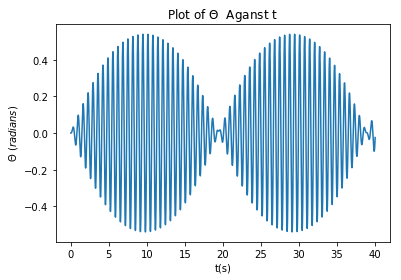

OMEGA =  9.46
Maximum value of Theta at this value of OMEGA is  0.5687 



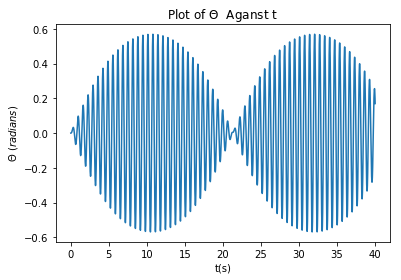

OMEGA =  9.47
Maximum value of Theta at this value of OMEGA is  0.6106 



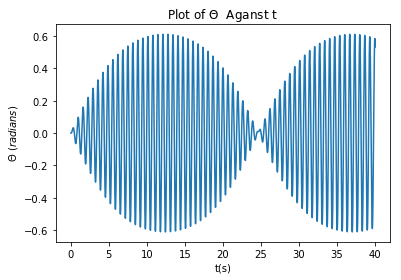

OMEGA =  9.48
Maximum value of Theta at this value of OMEGA is  1.3606 



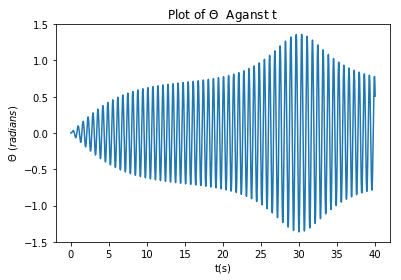

OMEGA =  9.49
Maximum value of Theta at this value of OMEGA is  1.3521 



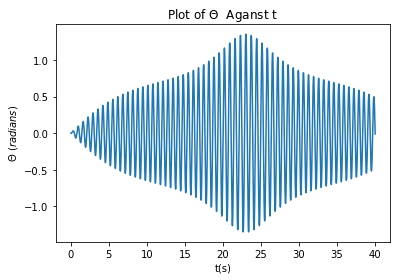

OMEGA =  9.5
Maximum value of Theta at this value of OMEGA is  1.3371 



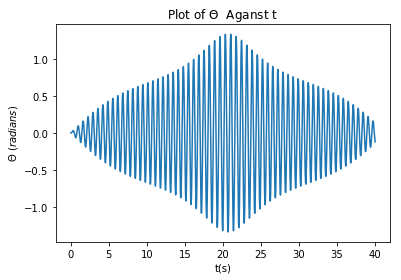

In [3]:
#1c
#repeat with C changing
#Thought the best way to find OMEGA would be to look for the point where the solution to theta was greatest.
#After attempts varying C between 2 and 10 (with a step of 1) I was able to narrow down the region to between 9 and 11
#Further attempts with step of 0.5 I narrowed down the region to 9.0 and 9.5 

#Now using a step of 0.01 between 9.45 and 9.50 I should beable to find OMEGA.

for OMEGA in np.arange(9.45,9.50,0.01):
    beta=OMEGA/omega
    print("OMEGA = ",OMEGA)

# Using Runge-Kutta of 4th order

    y = np.array([0.0, 0.0]) # Initial values

#start at t=0 -> x=0 (as omega*t when t=0 is 0)
    x = 0.0 # Start of integration (Always use floats)

#Finish at t=40s -> xStop= omega*40
    xStop = omega*40.0 # End of integration

    h = 0.01 # Step size


    X,Y = integrate(Eqs,x,y,xStop,h) # call the RK4 solver

    ThetaSol=Y[:,0]
    dThetaSol=Y[:,1]
    tsol=X/omega
    print('Maximum value of Theta at this value of OMEGA is ',round(np.amax(ThetaSol),4),'\n')
    
    pl.plot(tsol,ThetaSol)              # Plot the solutions
    pl.xlabel('t(s)')
    pl.ylabel('$\Theta \ (radians)$')
    pl.title('Plot of $ \Theta \ $ Aganst t')
    pl.show()

I can see that when $\Omega = 9.48$, $\theta$ is at it maximal value.

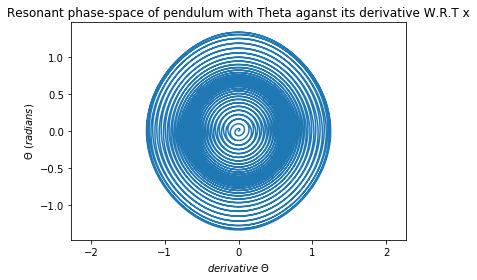

In [4]:
#1d
#Unfortunotly as my selsults for Theta and dTheta were rewritten so to plot the phase-space
#trajectory for the maximum Theta I need to repeat Runge-Kutta of 4th order for OMEGA=9.48

#I will reset the perameters (like intial values etc) once again, just incase.

OMEGA=9.48 #s^-1
y = np.array([0.0, 0.0]) # Initial values

#start at t=0 -> x=0 (as omega*t when t=0 is 0)
x = 0.0 # Start of integration (Always use floats)

#Finish at t=40s -> xStop= omega*40
xStop = omega*40.0 # End of integration

h = 0.01 # Step size

X,Y = integrate(Eqs,x,y,xStop,h) # call the RK4 solver again

ThetaSol=Y[:,0]
dThetaSol=Y[:,1]
tsol1=X/omega

#phase space plot at resonance
pl.plot(dThetaSol,ThetaSol)
pl.xlabel('$derivative \ \Theta\ $')
pl.ylabel('$ \Theta \ (radians) $')
pl.title('Resonant phase-space of pendulum with Theta aganst its derivative W.R.T x')
pl.axis('equal')
pl.show()

This plot shows the phase-space trajectory of the oscillation when it is in resonance with $\Omega = 9.48$. From what I have read is there is an observable reversal upon itself this shows a "separatrix" whish separates phase space into two regions. "Inside" the "separatrix" the pendulum would swing with back and forth. "Outside", the pedulum would complete full circles. - Paraphrased from wolfram demonstrations project to my best understanding.

In this plot of phase space there does not seem to be any reversal apon its self so it would seem that when the pendulum is in resonance it will continue swinging at maximum aplitude.

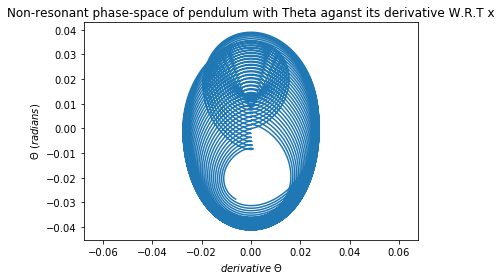

In [5]:
#phase space plot at inital OMEGA
pl.plot(dThetaSol1,ThetaSol1)
pl.xlabel('$derivative \ \Theta\ $')
pl.ylabel('$ \Theta \ (radians) $')
pl.title('Non-resonant phase-space of pendulum with Theta aganst its derivative W.R.T x')
pl.axis('equal')
pl.show()

This plot shows the phase-space trajectory of the oscillation when it is not in resonance whith the intial stating condition of $\Omega = 5$. In this plot of phase space there seems to be any reversal at the top. Following on what I beleive is correct from above; the point where it reverses apon itself is the "separatrix". So within this point the pedulum swings but outside this the pendulum is completing circles.